# Clean & Analyze Social Media

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Generating random data for the social media data

In [2]:
n = 500  
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']
data = {
    'User Id': range(1, n + 1),
    'Category': [random.choice(categories) for _ in range(n)],
    'Post Type': [random.choice(['Text', 'Image', 'Video']) for _ in range(n)],
    'Date': pd.date_range('2021-01-01', periods=n),
    'Age': np.random.randint(13, 72, size=n),
    'Gender': np.random.randint(0, 2, size=n),  # 0 for male, 1 for female 
    'Likes': np.random.randint(0, 10000, size=n),
    'Comments': np.random.randint(0, 1000, size=n),
    'Shares': np.random.randint(0, 1000, size=n),
    'Views': np.random.randint(0, 100000, size=n),
    'Engagement': np.random.randint(1, 100, size=n),  # Simulated engagement metric
    'Followers Count': np.random.randint(100, 10000, size=n)  # Simulated followers count
}

In [32]:
SM.to_csv('social_media_data.csv', index=False)

# Loading and Exploring Data

In [3]:
SM = pd.DataFrame(data)
SM.head(3)

,User Id,Category,Post Type,Date,Age,Gender,Likes,Comments,Shares,Views,Engagement,Followers Count
0,1,Fitness,Image,2021-01-01,13,1,8946,962,554,19769,34,3166
1,2,Health,Text,2021-01-02,41,0,35,703,736,19869,40,1983
2,3,Food,Image,2021-01-03,28,0,592,752,181,43544,36,3040


In [4]:
SM.tail(3)

,User Id,Category,Post Type,Date,Age,Gender,Likes,Comments,Shares,Views,Engagement,Followers Count
497,498,Fashion,Text,2022-05-13,54,0,8186,561,3,47506,7,480
498,499,Travel,Video,2022-05-14,71,0,4418,984,501,17607,29,7784
499,500,Food,Image,2022-05-15,36,0,7609,604,979,20068,41,2935


In [5]:
SM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   User Id          500 non-null    int64         
 1   Category         500 non-null    object        
 2   Post Type        500 non-null    object        
 3   Date             500 non-null    datetime64[ns]
 4   Age              500 non-null    int64         
 5   Gender           500 non-null    int64         
 6   Likes            500 non-null    int64         
 7   Comments         500 non-null    int64         
 8   Shares           500 non-null    int64         
 9   Views            500 non-null    int64         
 10  Engagement       500 non-null    int64         
 11  Followers Count  500 non-null    int64         
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 47.0+ KB


In [6]:
SM.describe()

,User Id,Age,Gender,Likes,Comments,Shares,Views,Engagement,Followers Count
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,250.500000,41.512000,0.466000,4995.168000,516.576000,507.204000,51557.750000,51.03600,5079.326000
std,144.481833,16.549611,0.499342,2939.869857,284.840736,289.300162,29315.463786,28.62981,2750.672515
min,1.000000,13.000000,0.000000,23.000000,4.000000,0.000000,202.000000,1.00000,100.000000
25%,125.750000,28.000000,0.000000,2420.750000,276.000000,257.750000,26449.000000,26.75000,2732.250000
50%,250.500000,41.500000,0.000000,5057.500000,534.000000,520.500000,52138.500000,53.00000,5105.000000
75%,375.250000,55.000000,1.000000,7586.500000,762.000000,757.000000,77361.500000,76.00000,7476.000000
max,500.000000,71.000000,1.000000,9985.000000,998.000000,999.000000,99707.000000,99.00000,9997.000000


In [7]:
print(SM['Category'].value_counts())

Travel     68
Health     65
Music      65
Culture    65
Food       64
Fitness    59
Fashion    58
Family     56
Name: Category, dtype: int64


In [8]:
print(SM['Post Type'].value_counts())

Text     177
Image    175
Video    148
Name: Post Type, dtype: int64


In [9]:
#I have no null values but the process of cleaning would be as the following:
SM.dropna(inplace=True)

# Visualize and Analyze the data

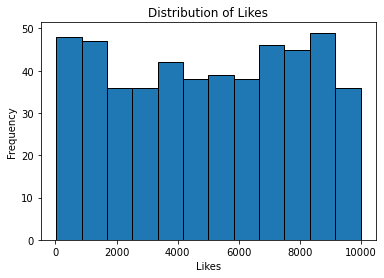

In [10]:
# Visualize 'Likes' with a histogram using Matplotlib
plt.hist(SM['Likes'], bins=12, edgecolor ="black")
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes')
plt.show()

In [11]:
# Calculate and print the mean of 'Likes'
print(f"Mean Likes: {SM['Likes'].mean()}")

Mean Likes: 4995.168


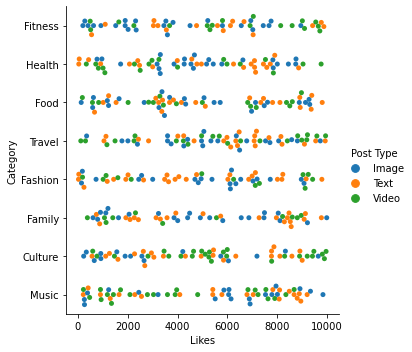

In [12]:
# Visualize 'Likes' per catergories and post types

sns.catplot(data=SM, x="Likes", y="Category", hue="Post Type", kind="swarm")

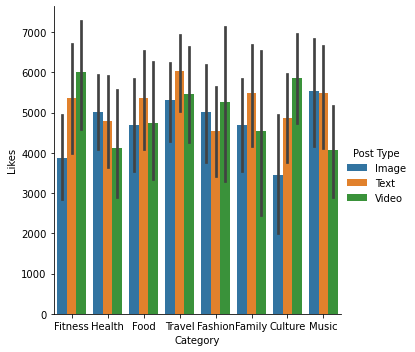

In [13]:
sns.catplot(data=SM, x="Category", y="Likes", hue="Post Type", kind="bar")

In [ ]:
As the previous catplot visualisation, This visualization also enables a comparative analysis of 'Likes' across various categories and post types, providing insight into their relative magnitudes within each category.

Text(0.5, 1.0, 'Likes by Gender and Post Type')

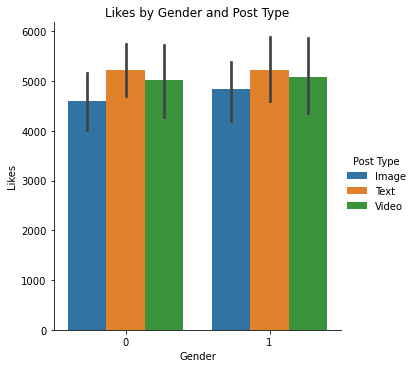

In [14]:
sns.catplot(data=SM, x="Gender", y="Likes", hue="Post Type", kind="bar")
plt.title("Likes by Gender and Post Type")

In [15]:
# Group by 'Post Type' and calculate the mean of 'Likes'and 
mean_likes_type= SM.groupby('Post Type')['Likes'].mean()
print("Mean Likes per Post Type:")
print(mean_likes_type)

Mean Likes per Post Type:
Post Type
Image    4717.142857
Text     5223.322034
Video    5051.054054
Name: Likes, dtype: float64


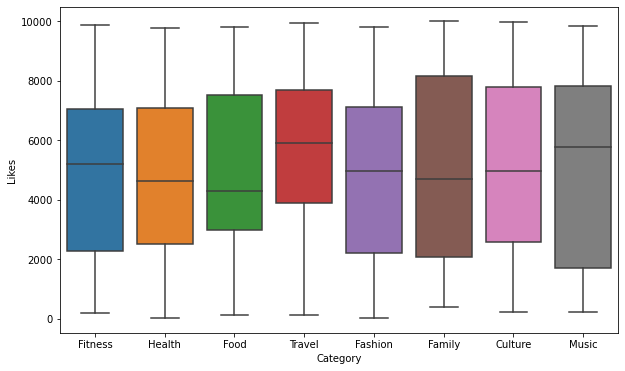

In [16]:
# Create a boxplot for 'Category' vs 'Likes'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Likes', data=SM)
plt.show()

In [17]:
# Group by 'Category' and calculate the mean of 'Likes'
mean_likes_category = SM.groupby('Category')['Likes'].mean()
print("Mean Likes per Category:")
print(mean_likes_category)

Mean Likes per Category:
Category
Culture    4914.923077
Family     4970.357143
Fashion    4867.620690
Fitness    4920.847458
Food       4937.671875
Health     4695.723077
Music      4999.984615
Travel     5601.323529
Name: Likes, dtype: float64


In [30]:
mean_G_category = SM.groupby('Category')['Gender'].mean()
print("Gender per Category:")
print(mean_G_category)

Gender per Category:
Category
Culture    0.476923
Family     0.517857
Fashion    0.362069
Fitness    0.491525
Food       0.375000
Health     0.538462
Music      0.492308
Travel     0.470588
Name: Gender, dtype: float64


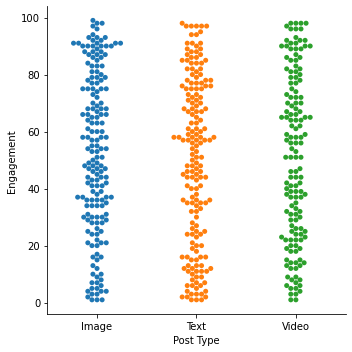

In [18]:
# Visualize 'Engagement' & Post Types
sns.catplot(data=SM, x="Post Type", y="Engagement", kind="swarm")

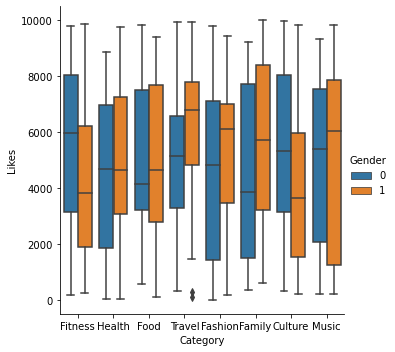

In [19]:
#Analyzing the difference of likes for genders by categories
sns.catplot(data=SM, x="Category", y="Likes", hue="Gender", kind="box")

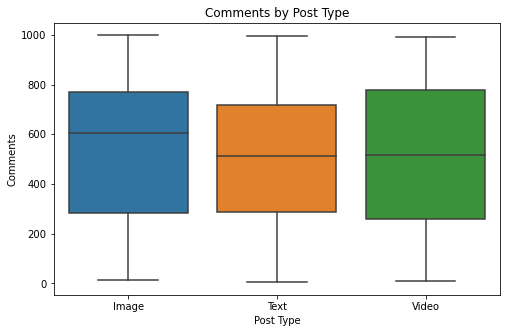

In [20]:
# Create a boxplot for 'Post Type' vs 'Comments'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Post Type', y='Comments', data=SM)
plt.title('Comments by Post Type')
plt.show()

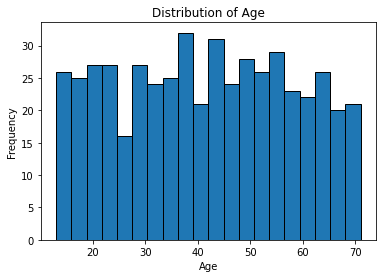

In [21]:
# Visualize 'Age' with a histogram using Matplotlib
plt.hist(SM['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

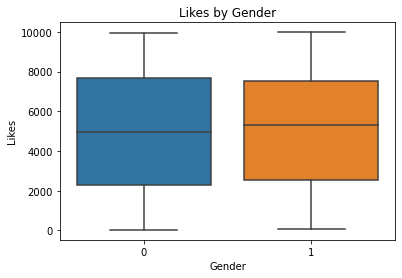

In [22]:
# Create a boxplot for 'Gender' vs 'Likes'
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Likes', data=SM)
plt.title('Likes by Gender')
plt.show()

In [23]:
# Group by 'Gendr' and calculate the mean of 'Likes'
mean_likes_category = SM.groupby('Gender')['Likes'].mean()
print("Mean Likes per Category:")
print(mean_likes_category)

Mean Likes per Category:
Gender
0    4958.127341
1    5037.613734
Name: Likes, dtype: float64


Engagements per Category:


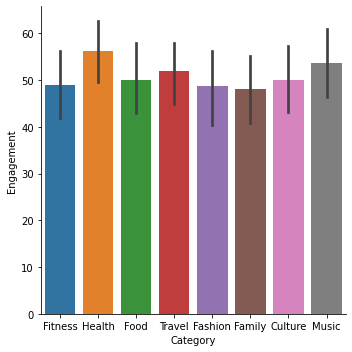

In [24]:
sns.catplot(data=SM, x="Category", y="Engagement", kind="bar")
print("Engagements per Category:")

Engagements per Post Types in each Category:


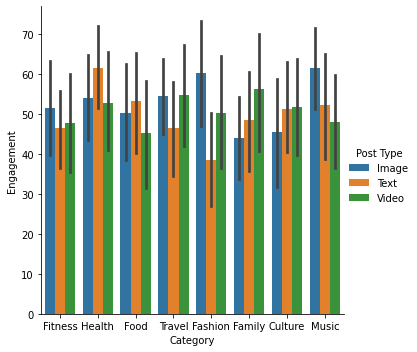

In [28]:
sns.catplot(data=SM, x="Category", y="Engagement", hue="Post Type", kind="bar")
print("Engagements per Post Types in each Category:")

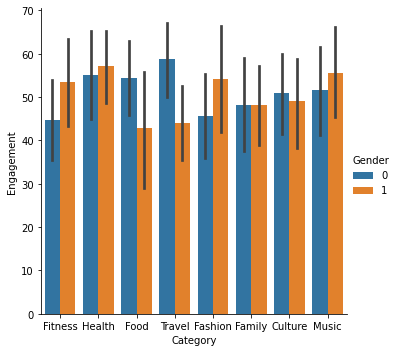

In [29]:
sns.catplot(data=SM, x="Category", y="Engagement", hue="Gender", kind="bar")